A firm  wants to make investments in a few companies. They wants to understand the global trends in investments so that they can take the investment decisions effectively.
The firm has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

So for the investment reference data-processing will be done only on english speaking countries. 

-The base strategy is to invest where most other investors are investing. This pattern is often observed by early stage starup investors\

* Data
The data is realtime investment data from crunchbase.com so the insights will be incredibly useful.

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

---Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Teclov can choose the type that is best suited for their strategy.
----Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Teclov’ favourites as well.
---Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

1. Company details
companies: A table with basic data of companies

3. Sector Classification:
mapping.csv: This file maps the numerous category names in the companies table
(such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The
purpose is to simplify the analysis into eight sector buckets, rather than trying to
analyse hundreds of them.

1. How many unique companies are present in rounds2?
2. How many unique companies are present in companies?
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.      Name the merged frame master_frame. How many observations are present in master_frame?

1. Calculate the most representative value of the investment amount for each of the four funding types 
   (venture, angel, seed, and private equity) and report the answers in the template provided on the previous page
2. Based on the most representative investment amount calculated above, which investment type do you think is the most        suitable for Teclov?

1. Top English-speaking country
2. Second English-speaking
   country
3. Third English-speaking
   country

For 3 countries find answers of the following-
1. Total number of investments(count)
2. Total amount of investment(USD)
3. Top sector (based on count of investments)
4. Second-best sector (based on count of investments)
5. Third-best sector (based on count of investments)
6. Number of investments in the top sector (refer to point 3)
7. Number of investments in the second-best sector (refer to point 4)
8. Number of investments in the third-best sector (refer to point 5)
9. For the top sector count-wise (point 3), which company received the highest investment?
10. For the second-best sector count-wise (point 4), which company received the highest investment?

1. A plot showing the fraction of total investments (globally) in venture, seed, and
   private equity, and the average amount of investment in each funding type.
   This chart should make it clear that a certain funding type (FT) is best suited
   for Teclov.
2. A plot showing the top 9 countries against the total amount of investments of
   funding type FT. This should make the top 3 countries (Country 1, Country 2,
   and Country 3) very clear.
3. A plot showing the number of investments in the top 3 sectors of the top 3
   countries on one chart (for the chosen investment type FT).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
mapping=pd.read_csv(r'E:\Eiren\investment\mapping.csv')
rounds=pd.read_csv(r'E:\Eiren\investment\rounds2.csv',encoding='ISO-8859-1')
companies=pd.read_csv(r'E:\Eiren\investment\companies.txt',sep='\t',encoding='ANSI')

In [3]:
companies.rename(columns={'ï»¿permalink': 'permalink'}, inplace=True)
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds.rename(columns={'company_permalink': 'permalink'}, inplace=True)
rounds.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [6]:
print(companies.shape)
print(rounds.shape)
print(mapping.shape)

(66368, 10)
(114949, 6)
(688, 10)


In [7]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds.dropna(subset=['raised_amount_usd'], how='all', inplace=True)


In [9]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [10]:
companies['permalink']=companies['permalink'].str.lower()
companies['name']=companies['name'].str.lower()
rounds['permalink']=rounds['permalink'].str.lower()

In [11]:
rounds['permalink'].value_counts()

/organization/solarflare                   19
/organization/exagen-diagnostics           18
/organization/semprius                     18
/organization/endogastric-solutions        17
/organization/tigo-energy                  17
                                           ..
/organization/xcelaero                      1
/organization/missinglink                   1
/organization/trinnect                      1
/organization/infonomi-technologies-co-     1
/organization/whensoon                      1
Name: permalink, Length: 53915, dtype: int64

In [12]:
rounds=rounds[(rounds['funding_round_type'] == 'venture') | (rounds['funding_round_type'] == 'seed') |
             (rounds['funding_round_type'] == 'angel') | (rounds['funding_round_type'] == 'private_equity')]

In [13]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                80627 non-null  object 
 1   funding_round_permalink  80627 non-null  object 
 2   funding_round_type       80627 non-null  object 
 3   funding_round_code       28153 non-null  object 
 4   funded_at                80627 non-null  object 
 5   raised_amount_usd        80627 non-null  float64
dtypes: float64(1), object(5)
memory usage: 4.3+ MB


In [14]:
companies['permalink'].unique().shape

(66368,)

In [15]:
rounds['permalink'].unique().shape

(48389,)

In [16]:
rounds['permalink'].value_counts()

/organization/tyro-payments                16
/organization/endogastric-solutions        14
/organization/pivot3                       13
/organization/terascala                    13
/organization/aperto-networks              13
                                           ..
/organization/polco                         1
/organization/cannmedica-pharma             1
/organization/groom-energy-solutions        1
/organization/albatross-security-forces     1
/organization/whensoon                      1
Name: permalink, Length: 48389, dtype: int64

In [20]:
rounds.shape

(80627, 6)

In [21]:
main=pd.merge(companies,rounds,on='permalink',how='right')
main.shape

(80627, 15)

In [22]:
main = main[main.name.notnull()]

In [23]:
main

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80621,/organization/zzish,zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
80622,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0
80623,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
80624,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0


There were 75 companies which were not present in 'companies' file and were unreadable so we removed those companies data whoise name is not provided in the companies file.

In [24]:
main['permalink'].unique().shape

(48359,)

In [25]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80596 entries, 0 to 80625
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                80596 non-null  object 
 1   name                     80596 non-null  object 
 2   homepage_url             77153 non-null  object 
 3   category_list            79745 non-null  object 
 4   status                   80596 non-null  object 
 5   country_code             75591 non-null  object 
 6   state_code               74041 non-null  object 
 7   region                   74549 non-null  object 
 8   city                     74552 non-null  object 
 9   founded_at               67165 non-null  object 
 10  funding_round_permalink  80596 non-null  object 
 11  funding_round_type       80596 non-null  object 
 12  funding_round_code       28149 non-null  object 
 13  funded_at                80596 non-null  object 
 14  raised_amount_usd     

In [26]:
main = main[main.raised_amount_usd.notnull()]
main = main[main.country_code.notnull()]
main = main[main.category_list.notnull()]
main = main[main.region.notnull()]
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74079 entries, 0 to 80625
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                74079 non-null  object 
 1   name                     74079 non-null  object 
 2   homepage_url             71573 non-null  object 
 3   category_list            74079 non-null  object 
 4   status                   74079 non-null  object 
 5   country_code             74079 non-null  object 
 6   state_code               73282 non-null  object 
 7   region                   74079 non-null  object 
 8   city                     74079 non-null  object 
 9   founded_at               63249 non-null  object 
 10  funding_round_permalink  74079 non-null  object 
 11  funding_round_type       74079 non-null  object 
 12  funding_round_code       26433 non-null  object 
 13  funded_at                74079 non-null  object 
 14  raised_amount_usd     

In [27]:
main.drop(['homepage_url','state_code','region','city','founded_at',
           'funding_round_code'],axis=1,inplace=True)

In [28]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74079 entries, 0 to 80625
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                74079 non-null  object 
 1   name                     74079 non-null  object 
 2   category_list            74079 non-null  object 
 3   status                   74079 non-null  object 
 4   country_code             74079 non-null  object 
 5   funding_round_permalink  74079 non-null  object 
 6   funding_round_type       74079 non-null  object 
 7   funded_at                74079 non-null  object 
 8   raised_amount_usd        74079 non-null  float64
dtypes: float64(1), object(8)
memory usage: 5.7+ MB


In [29]:
main.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


# Country

In [32]:
country_tab=main.pivot_table(index='funding_round_permalink',columns='country_code',values='raised_amount_usd')
#country_tab = pd.DataFrame(country_tab.to_records())
country_tab.head()


country_code,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BAH,BEL,BGD,...,UGA,UKR,URY,USA,UZB,VEN,VNM,ZAF,ZMB,ZWE
funding_round_permalink,,,,,,,,,,,,,,,,,,,,,
/funding-round/000066459ef68958129a2e225e577eb8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8500000.0,NaN,NaN,NaN,NaN,NaN,NaN
/funding-round/0001cbd1f7e24a56607cc57f46cc7dcb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15000000.0,NaN,NaN,NaN,NaN,NaN,NaN
/funding-round/0002fd5d8196b8d73612d799253faf9c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4040262.0,NaN,NaN,NaN,NaN,NaN,NaN
/funding-round/000433319b35507f990e72e376cdf7b8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN
/funding-round/00056f55bd28c2c1c3d347a6a6266002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
sum1=country_tab.sum(axis=0)
sort=sum1.sort_values(ascending=False)
sort=sort.to_frame().reset_index()
v = sort.rename(columns= {0: 'Total amount'})
top9=v.iloc[0:9]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
top9


,country_code,Total amount
0,USA,507609906741.000
1,CHN,53335428203.000
2,GBR,24845793659.000
3,IND,20752805877.000
4,CAN,13116339109.000
5,DEU,8446324810.000
6,FRA,7650755297.000
7,ISR,7592441590.000
8,RUS,4916088708.000


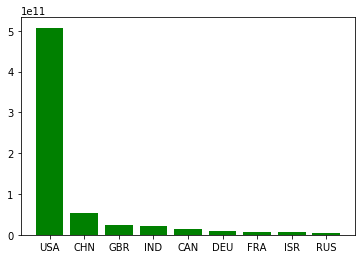

In [34]:
x = top9['country_code']
energy = top9['Total amount']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()


## USA- 500 billion 
## China- 53 billion
## U.K- 24 Billion

### But china is not english speaking country 


## India- 20 Billion

In [36]:
main.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.000
1,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.000
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.000
4,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.000
5,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.000


# Investment type

In [37]:
USA=main[main['country_code'] == 'USA']
UK=main[main['country_code'] == 'GBR']
INDIA=main[main['country_code'] == 'IND']

In [39]:
#Creating pivot_table for funding type
usa_table=USA.pivot_table(index='funding_round_permalink',columns='funding_round_type',values='raised_amount_usd')
uk_table=UK.pivot_table(index='funding_round_permalink',columns='funding_round_type',values='raised_amount_usd')
india_table=INDIA.pivot_table(index='funding_round_permalink',columns='funding_round_type',values='raised_amount_usd')


In [40]:
inv_usa=pd.DataFrame(usa_table.sum(),columns=['Total_inv']).sort_values(['Total_inv'], ascending=[False])
inv_usa.reset_index(inplace=True)
inv_usa

,funding_round_type,Total_inv
0,venture,419443207940.000
1,private_equity,75723276799.000
2,seed,10442858785.000
3,angel,2000563217.000


In [41]:
inv_uk=pd.DataFrame(uk_table.sum(),columns=['Total_inv']).sort_values(['Total_inv'], ascending=[False])
inv_uk.reset_index(inplace=True)
inv_uk

,funding_round_type,Total_inv
0,venture,19235529764.000
1,private_equity,4266102688.000
2,seed,1056501712.000
3,angel,287659495.000


In [42]:
inv_india=pd.DataFrame(india_table.sum(),columns=['Total_inv']).sort_values(['Total_inv'], ascending=[False])
inv_india.reset_index(inplace=True)
inv_india

,funding_round_type,Total_inv
0,venture,14167808718.000
1,private_equity,6199512053.000
2,seed,310632402.000
3,angel,74852704.000


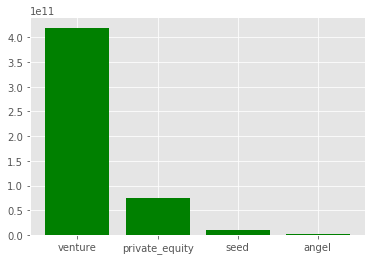

In [46]:
plt.style.use('ggplot')

x = inv_usa['funding_round_type']
energy = inv_usa['Total_inv']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()

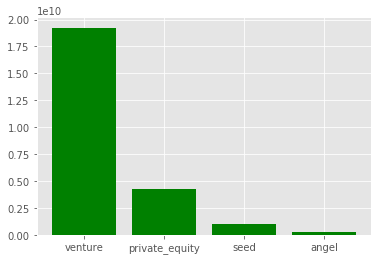

In [47]:
plt.style.use('ggplot')

x = inv_uk['funding_round_type']
energy = inv_uk['Total_inv']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()

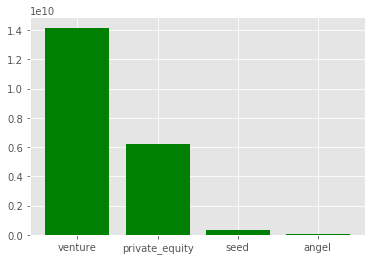

In [44]:
plt.style.use('ggplot')

x = inv_india['funding_round_type']
energy = inv_india['Total_inv']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()

### From the below results we can observe that the highest investment is done by investment type- Venture following private_equity,seed and angel.

### Similarly the highest number of investments are done in Venture funding type following seed, then angel and private_equity  

## USA median and average value

In [48]:
#Most representative value
print(usa_table['seed'].median())
print(usa_table['angel'].median())
print(usa_table['venture'].median())
print(usa_table['private_equity'].median())

450000.0
500000.0
5000000.0
19999999.5


In [49]:
print(usa_table['seed'].mean())
print(usa_table['angel'].mean())
print(usa_table['venture'].mean())
print(usa_table['private_equity'].mean())

863117.5126043474
890722.71460374
11680401.223614592
60968821.89935588


## UK median and average value

In [51]:
#Most representative value
print(uk_table['seed'].median())
print(uk_table['angel'].median())
print(uk_table['venture'].median())
print(uk_table['private_equity'].median())

291192.0
409562.0
4412050.0
10500000.0


In [282]:
#Most representative value
print(uk_table['seed'].mean())
print(uk_table['angel'].mean())
print(uk_table['venture'].mean())
print(uk_table['private_equity'].mean())

715787.0677506775
763022.5331564987
10008080.002081165
47401140.97777778


## INDIA median and average value

In [52]:
#Most representative value
print(india_table['seed'].median())
print(india_table['angel'].median())
print(india_table['venture'].median())
print(india_table['private_equity'].median())

240000.0
250000.0
7400000.0
60000000.0


In [54]:
#Most representative value
print(india_table['seed'].mean())
print(india_table['angel'].mean())
print(india_table['venture'].mean())
print(india_table['private_equity'].mean())

591680.7657142857
479825.0256410256
17383814.377914112
129156501.10416667


# Sector

### usa

In [175]:
usa_venture=USA[USA['funding_round_type'] == 'venture']
uk_venture=UK[UK['funding_round_type'] == 'venture']
india_venture=INDIA[INDIA['funding_round_type'] == 'venture']

In [176]:
usa_venture['primary_sector']=usa_venture['category_list'].str.split('|',n=1,expand=True)[0]
#link1=main2[['primary_sector','funding_round_permalink']]
mapping=mapping.rename(columns={'category_list':'primary_sector'})
usa_mapped=pd.merge(usa_venture,mapping,on='primary_sector')

uk_venture['primary_sector']=uk_venture['category_list'].str.split('|',n=1,expand=True)[0]
#link1=main2[['primary_sector','funding_round_permalink']]
#mapping=mapping.rename(columns={'category_list':'primary_sector'})
uk_mapped=pd.merge(uk_venture,mapping,on='primary_sector')


india_venture['primary_sector']=india_venture['category_list'].str.split('|',n=1,expand=True)[0]
#link1=main2[['primary_sector','funding_round_permalink']]
#mapping=mapping.rename(columns={'category_list':'primary_sector'})
india_mapped=pd.merge(india_venture,mapping,on='primary_sector')


C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [177]:
usa_mapped.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'primary_sector', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [178]:
sector_usa=usa_mapped.iloc[:, 9:]
usa_mapped['sector']=pd.get_dummies(sector_usa).idxmax(1)
usa_mapped.drop(usa_mapped.loc[:, 'Automotive & Sports':'Social, Finance, Analytics, Advertising'].columns, axis = 1,inplace=True)

sector_uk=uk_mapped.iloc[:, 9:]
uk_mapped['sector']=pd.get_dummies(sector_uk).idxmax(1)
uk_mapped.drop(uk_mapped.loc[:, 'Automotive & Sports':'Social, Finance, Analytics, Advertising'].columns, axis = 1,inplace=True)

sector_india=india_mapped.iloc[:, 9:]
india_mapped['sector']=pd.get_dummies(sector_india).idxmax(1)
india_mapped.drop(india_mapped.loc[:, 'Automotive & Sports':'Social, Finance, Analytics, Advertising'].columns, axis = 1,inplace=True)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

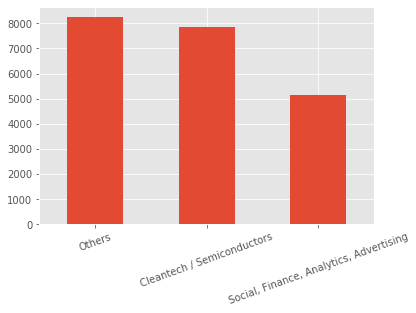

In [179]:
usa_mapped['sector'].value_counts().nlargest(3).plot.bar()
plt.xticks(rotation=20)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

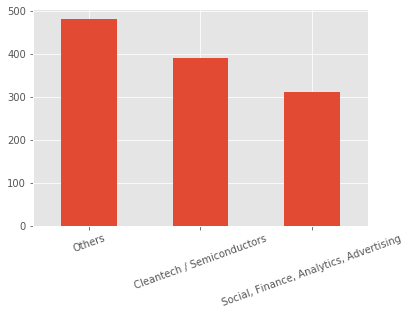

In [180]:
uk_mapped['sector'].value_counts().nlargest(3).plot.bar()
plt.xticks(rotation=20)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

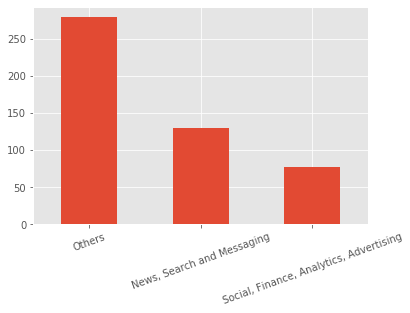

In [181]:
india_mapped['sector'].value_counts().nlargest(3).plot.bar()
plt.xticks(rotation=20)

## Company with highest investment from the top 2 sector of 3 countries

In [268]:
usa_last=usa_mapped[(usa_mapped['sector'] == 'Others') | (usa_mapped['sector'] == 'Cleantech / Semiconductors')]

uk_last=uk_mapped[(uk_mapped['sector'] == 'Others') | (uk_mapped['sector'] == 'Cleantech / Semiconductors')]

india_last=india_mapped[(india_mapped['sector'] == 'Others') | (india_mapped['sector'] == 'News, Search and Messaging')]

## USA

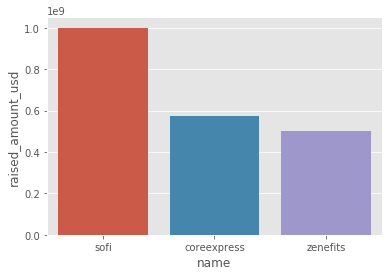

In [269]:
#usa_last[usa_last['sector'] == 'Others'].nlargest(1)
company_usa_others=usa_last[usa_last['sector'] == 'Others'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_usa_others)  

In [280]:
company_usa_others

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
15597,sofi,1000000000.000,USA,Others,Education,venture
24941,coreexpress,573000000.000,USA,Others,Services,venture
12944,zenefits,500000000.000,USA,Others,Enterprise Software,venture


In [270]:
company_usa_cleantech=usa_last[usa_last['sector'] == 'Cleantech / Semiconductors'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]

company_usa_cleantech

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
26394,freescale semiconductor,17600000000.000,USA,Cleantech / Semiconductors,Semiconductors,venture
8865,juno therapeutics,849803496.000,USA,Cleantech / Semiconductors,Biotechnology,venture
30518,tenaska,550000000.000,USA,Cleantech / Semiconductors,Energy,venture


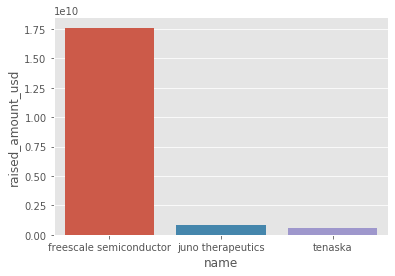

In [271]:
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_usa_cleantech)

## UK

In [272]:
company_uk_others=uk_last[uk_last['sector'] == 'Others'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]


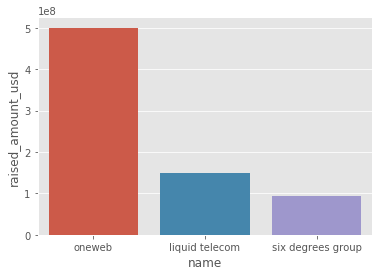

In [273]:
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_uk_others)

In [281]:
company_uk_others

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
1442,oneweb,500000000.000,GBR,Others,Technology,venture
1440,liquid telecom,150000000.000,GBR,Others,Telecommunications,venture
935,six degrees group,93863505.000,GBR,Others,Web Hosting,venture


In [274]:
company_uk_Social=uk_last[uk_last['sector'] == 'Cleantech / Semiconductors'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]

company_uk_Social

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
252,immunocore,320000000.000,GBR,Cleantech / Semiconductors,Biotechnology,venture
344,reneuron group,105148268.000,GBR,Cleantech / Semiconductors,Biotechnology,venture
141,adaptimmune,104000000.000,GBR,Cleantech / Semiconductors,Biotechnology,venture


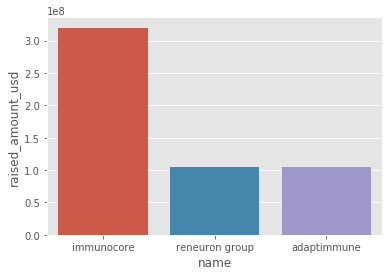

In [275]:
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_uk_Social)

## India

In [276]:
company_india_others=india_last[india_last['sector'] == 'Others'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]
company_india_others

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
37,flipkart,1000000000.000,IND,Others,E-Commerce,venture
41,flipkart,700000000.000,IND,Others,E-Commerce,venture
499,tata teleservices,212000000.000,IND,Others,Services,venture


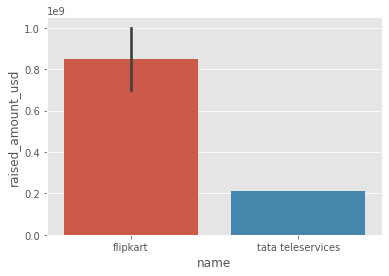

In [277]:
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_india_others)

In [278]:
company_india_news=india_last[india_last['sector'] == 'News, Search and Messaging'].nlargest(3,['raised_amount_usd'])[['name','raised_amount_usd',
                                                                                        'country_code','sector',
                                                                                        'primary_sector',
                                                                                       'funding_round_type']]
company_india_news

,name,raised_amount_usd,country_code,sector,primary_sector,funding_round_type
372,quikr,150000000.000,IND,"News, Search and Messaging",Curated Web,venture
373,quikr,90000000.000,IND,"News, Search and Messaging",Curated Web,venture
402,freecharge,80000000.000,IND,"News, Search and Messaging",Internet,venture


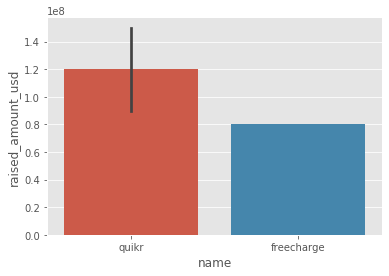

In [279]:
ax = sns.barplot(x="name", y="raised_amount_usd", data=company_india_news)

# Investment Type

In [ ]:
#Creating pivot_table for funding type
table=main.pivot_table(index='funding_round_permalink',columns='funding_round_type',values='raised_amount_usd')
table.head()

In [ ]:
table.info()

table.drop(['convertible_note','debt_financing','equity_crowdfunding','grant','non_equity_assistance',
           'post_ipo_debt','post_ipo_equity','secondary_market','undisclosed','product_crowdfunding'],axis=1,inplace=True)

In [ ]:
inv=pd.DataFrame(table.sum(),columns=['Total_inv']).sort_values(['Total_inv'], ascending=[False])
inv.reset_index(inplace=True)
inv

In [ ]:
plt.style.use('ggplot')

x = inv['funding_round_type']
energy = inv['Total_inv']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()

In [ ]:
table.info()

## From the above code outputs it can be interpreted that  for investment amount between 5-15 million, 'Venture'  is best possible funding type as the average value of Investment amount done by venture funding type is 'eleven million seven hundred forty-two thousand seven hundred forty-four' and the median value is '5 million'

# Countries

In [ ]:
table.head()

In [ ]:
tabledf = pd.DataFrame(table.to_records())
tabledf.head()

In [ ]:
vendf=tabledf[['funding_round_permalink','venture']]
ven_new = vendf[vendf.isnull().sum(axis=1) < 1]
ven_new.head()

In [ ]:
n=pd.merge(ven_new,main,on='funding_round_permalink',how='left')
n.head()


In [ ]:
n.shape

In [ ]:
country_tab=n.pivot_table(index='funding_round_permalink',columns='country_code',values='raised_amount_usd')
#country_tab = pd.DataFrame(country_tab.to_records())
country_tab.head()


In [ ]:
sum1=country_tab.sum(axis=0)
sort=sum1.sort_values(ascending=False)
sort=sort.to_frame().reset_index()
v = sort.rename(columns= {0: 'Total amount'})
top9=v.iloc[0:9]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
top9

In [ ]:
#plt.style.use('ggplot')

x = top9['country_code']
energy = top9['Total amount']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')


plt.xticks(x_pos, x)

plt.show()

## Sector

In [ ]:
main2=n[(n['country_code'] == 'USA') | (n['country_code'] == 'IND') | (n['country_code'] == 'GBR')]

In [ ]:
main2.head()

In [ ]:
main2['country_code'].value_counts()

In [ ]:
main2.shape

In [ ]:
mapping.head()

In [ ]:
main2['primary_sector']=main2['category_list'].str.split('|',n=1,expand=True)[0]
#link1=main2[['primary_sector','funding_round_permalink']]
mapping=mapping.rename(columns={'category_list':'primary_sector'})
main3=pd.merge(main2,mapping,on='primary_sector')
main3.head()

In [ ]:
main3.shape

In [ ]:

sector=main3.iloc[:, 11:]
main3['sector']=pd.get_dummies(sector).idxmax(1)
#sector.apply(main3[['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing',
 #      'News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']])
main3.drop(['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing',
           'News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],axis=1,inplace=True)  

In [ ]:
main3.head()

sector_count=pd.DataFrame(main3[['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing',
       'News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']].sum(),columns=['count'])
sector_count.reset_index(inplace=True)
sector_count.sort_values('count',ascending=False)

In [ ]:
main3['sector'].value_counts().plot.bar()

In [ ]:
9147+8338+5666+4757+3459+2667+2047+568

### Others- 9147
### Cleantech / Semiconductors- 8338
### Social, Finance, Analytics, Advertising	- 5666

In [ ]:
main3.head()

In [ ]:
USA=main3[main3['country_code'] == 'USA']
UK=main3[main3['country_code'] == 'GBR']
INDIA=main3[main3['country_code'] == 'IND']


In [ ]:
INDIA['sector'].value_counts()

In [ ]:
USA_SECTOR=USA[(USA['sector'] == 'Others') | (USA['sector'] == 'Cleantech / Semiconductors') | (USA['sector'] == 'Social, Finance, Analytics, Advertising')]
UK_SECTOR=UK[(UK['sector'] == 'Others') | (UK['sector'] == 'Cleantech / Semiconductors')  | (UK['sector'] == 'Social, Finance, Analytics, Advertising')]
INDIA_SECTOR=INDIA[(INDIA['sector'] == 'Others') | (INDIA['sector'] == 'Cleantech / Semiconductors')  | (INDIA['sector'] == 'Social, Finance, Analytics, Advertising')]

usa_top1sec_company=USA[(USA['sector'] == 'Others')]
uk_top1sec_company=UK[(UK['sector'] == 'Others')]
india_top1sec_company=[(INDIA['sector'] == 'Others')]

usa_top2sec_company=USA[(USA['sector'] == 'Cleantech / Semiconductors')]
uk_top2sec_company=UK[(UK['sector'] == 'Cleantech / Semiconductors')]
india_top2sec_company=[(INDIA['sector'] == 'Cleantech / Semiconductors')]

In [ ]:
usa_top1_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
uk_top1_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
india_top1sec_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
usa_top2sec_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
uk_top2sec_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
india_top2sec_company.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:

USA_SECTOR.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]


In [ ]:
UK_SECTOR.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
INDIA_SECTOR.nlargest(1,['raised_amount_usd'])[['name','raised_amount_usd']]

In [ ]:
INDIA_SECTOR['name'].duplicated().value_counts()